In [1]:
import numpy as np
import pandas as pd

## Data import

In [2]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Shahd\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
x = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

In [4]:
# metadata 
banknote_authentication.metadata

{'uci_id': 267,
 'name': 'Banknote Authentication',
 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication',
 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv',
 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.',
 'area': 'Computer Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1372,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2012,
 'last_updated': 'Fri Feb 16 2024',
 'dataset_doi': '10.24432/C55P57',
 'creators': ['Volker Lohweg'],
 'intro_paper': None,
 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection w

In [5]:
# variable information 
banknote_authentication.variables

,name,role,type,demographic,description,units,missing_values
0,variance,Feature,Continuous,None,variance of Wavelet Transformed image,None,no
1,skewness,Feature,Continuous,None,skewness of Wavelet Transformed image,None,no
2,curtosis,Feature,Continuous,None,curtosis of Wavelet Transformed image,None,no
3,entropy,Feature,Continuous,None,entropy of image,None,no
4,class,Target,Integer,None,None,None,no


## Data exploration

In [6]:
df = pd.concat([x, y], axis=1)
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [7]:
df.tail(10)

,variance,skewness,curtosis,entropy,class
1362,-2.16680,1.59330,0.045122,-1.67800,1
1363,-1.16670,-1.42370,2.924100,0.66119,1
1364,-2.83910,-6.63000,10.484900,-0.42113,1
1365,-4.50460,-5.81260,10.886700,-0.52846,1
1366,-2.41000,3.74330,-0.402150,-1.29530,1
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,17.593200,-2.77710,1
1370,-3.56370,-8.38270,12.393000,-1.28230,1
1371,-2.54190,-0.65804,2.684200,1.19520,1


**note: data is sorted by class**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [10]:
# Check for missing values
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [11]:
df["class"].value_counts()

class
0    762
1    610
Name: count, dtype: int64

**note: data is nearly balanced**

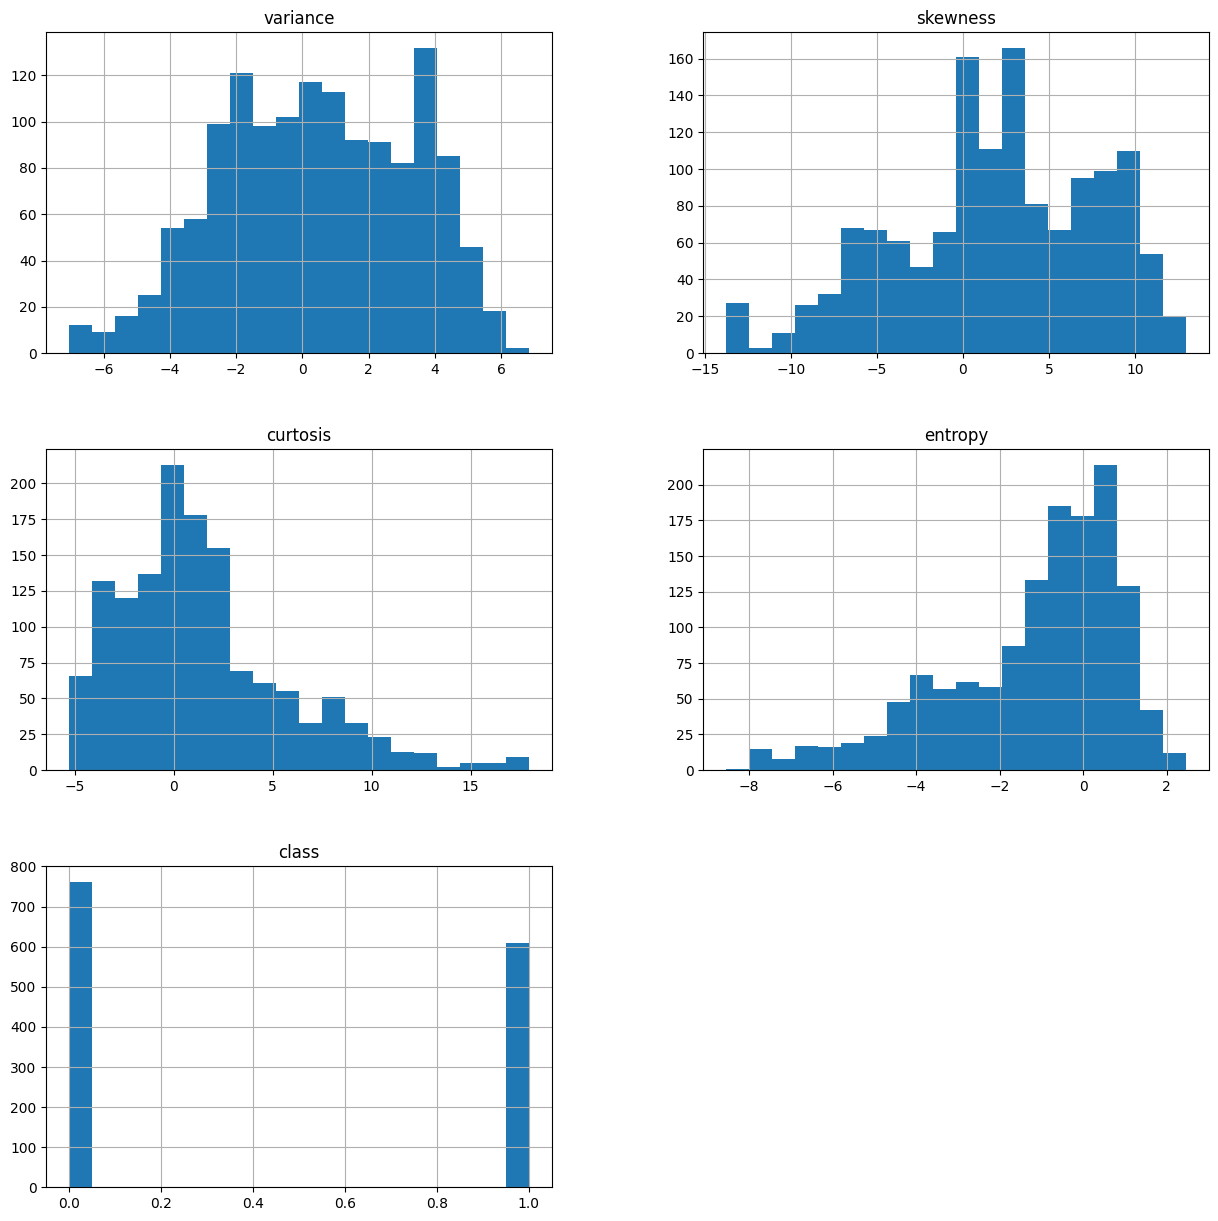

In [12]:
from matplotlib import pyplot as plt
df.hist(bins=20, figsize=(15, 15))
plt.show()

<Axes: >

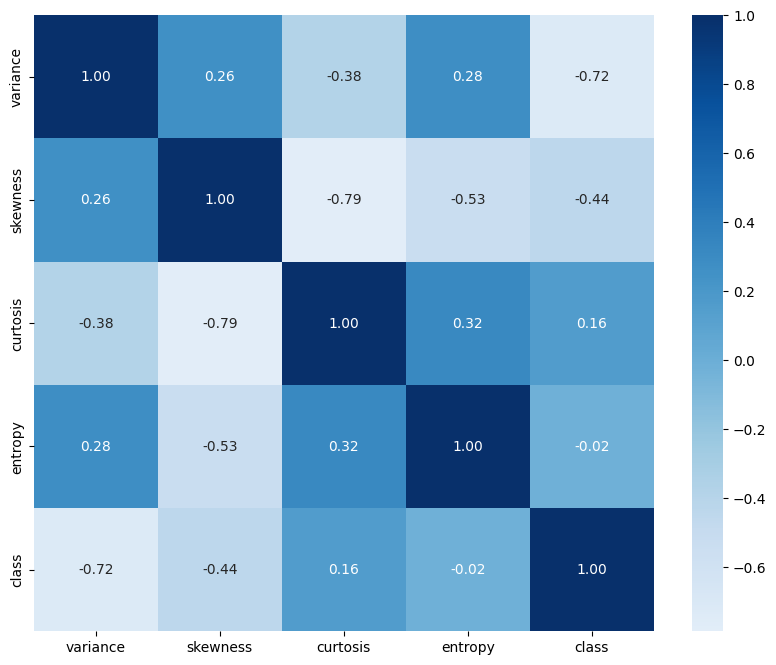

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues", center=0)

**note: variance is the most correlated feature with class**

## Data preprocessing

In [14]:
# Convert labels from {0,1} to {-1, +1} for SVM
y = np.where(y == 0, -1, 1)
y = y.reshape(-1)          # OR

In [15]:
#normalize features:
x= (x - np.mean(x, axis=0)) / np.std(x, axis=0)
x = x.to_numpy()


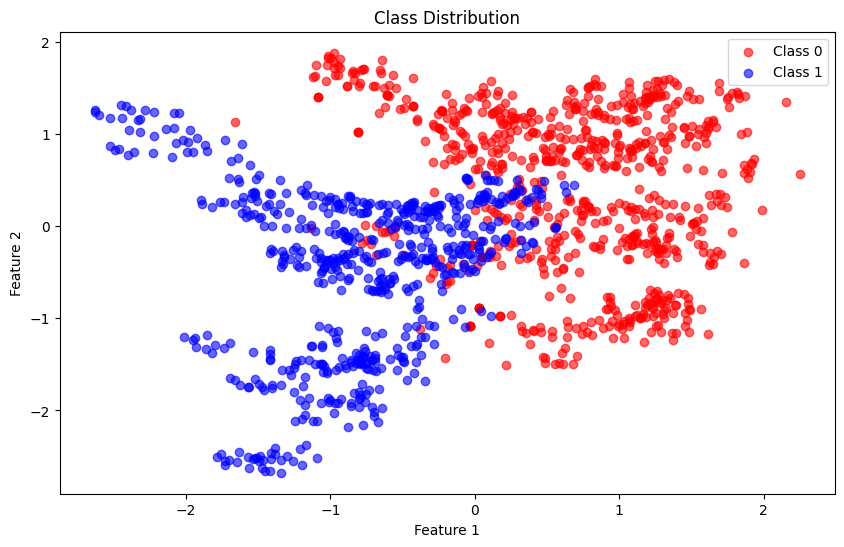

In [16]:
plt.figure(figsize=(10, 6))

# Plot points for each class
plt.scatter(x[:, 0][y == -1], x[:, 1][y == -1], color='red', label='Class 0', alpha=0.6)
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], color='blue', label='Class 1', alpha=0.6)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Class Distribution')
plt.legend()
plt.show()

In [17]:
x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [18]:
y

array([-1, -1, -1, ...,  1,  1,  1])

## Train, test, validation split 

In [19]:
def train_test_val_split(x,y, test_ratio, val_ratio, random_seed):
    """
    Function to split the dataset into training, testing, and validation sets,
    first shuffling the data indices, then splitting it according to the specified
    test and validation ratios.
    """
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)

    x = x[indices]
    y = y[indices]

    n_total = len(x)
    n_test = int(test_ratio* n_total)
    n_val = int(val_ratio* n_total)
    n_train = n_total - n_test - n_val
    x_train = x[:n_train]
    y_train = y[:n_train]

    x_val = x[n_train:n_train + n_val]
    y_val = y[n_train:n_train + n_val]

    x_test = x[n_train + n_val:]
    y_test = y[n_train + n_val:]

    return x_train, y_train, x_val, y_val, x_test, y_test




In [20]:
x_train, y_train, x_val, y_val, x_test, y_test = train_test_val_split(x,y, test_ratio=0.2, val_ratio=0.2, random_seed=42)

In [21]:
print("train data size:", len(x_train))
print("validation data size:", len(x_val))
print("test data size:", len(x_test))

train data size: 824
validation data size: 274
test data size: 274


## SVM (support vector machine) model from scratch 

In [22]:
class SVMFromScratch:

# model building:

    def __init__(self, lambda_param=0.01, learning_rate=0.01, max_iter=1000, optimizer='subgradient', delta=1.0):
        """
         instiantiates the SVM model with the specified parameters.
        """
        self.lambda_param = lambda_param # regularization parameter
        self.learning_rate = learning_rate # learning rate
        self.max_iter = max_iter # number of iterations
        self.optimizer = optimizer # 'subgradient' or 'gradient'
        self.delta = delta # for smooth hinge loss
        self.w = None # weights
        self.b = 0 # bias


    def fit(self, X_train, y_train, X_val=None, y_val=None, X_test=None, y_test=None):
        """
        in this function we train the SVM model using the specified optimizer (subgradient or gradient).
        Steps:
        1. Initialize weights and bias.
        2. Iterate over the dataset for a specified number of iterations.
        3. For each sample, compute the margin.
        4. Update the weights and bias based on the optimizer.
        5. If using subgradient, update the weights and bias based on the margin.
        6. If using gradient, update the weights and bias based on the smooth hinge loss.
        7. Return the loss and accuarcy for training, validation, and test sets with gradient and subgradient.
        """
        n_samples, n_features = X_train.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Lists to store the loss and accuracy
        train_losses = []
        train_accuracies = []
        val_accuracies = [] if X_val is not None and y_val is not None else None
        val_losses = [] if X_val is not None and y_val is not None else None
        test_accuracies = [] if X_test is not None and y_test is not None else None
        test_losses = [] if X_test is not None and y_test is not None else None

        for epoch in range(self.max_iter):
            total_loss = 0
            correct_train = 0

            for idx, x_i in enumerate(X_train): #Loop through each training example individually (stochastic gradient descent style)
                margin = y_train[idx] * (np.dot(x_i, self.w) + self.b) #computes how correctly the sample classified (yi*w)+bias

                # Subgradient descent
                if self.optimizer == 'subgradient':
                    if margin >= 1: #if correctly classified
                        dw = self.lambda_param * self.w #update weights
                        db = 0
                    else: #if misclassified
                        dw = self.lambda_param * self.w - y_train[idx] * x_i #add hinge loss subgradient
                        db = -y_train[idx]

                # Gradient descent with smooth hinge loss
                elif self.optimizer == 'gradient': # smooth hinge
                    if margin >= self.delta: #correctly classified (no loss)
                        dw = self.lambda_param * self.w
                        db = 0
                    elif 0 < margin < self.delta: #correctly classified but not confidently
                        grad_loss = -y_train[idx] * x_i * (self.delta - margin) / self.delta
                        dw = self.lambda_param * self.w + grad_loss
                        db = -y_train[idx] * (self.delta - margin) / self.delta
                    else: #not correctly classified
                        dw = self.lambda_param * self.w - y_train[idx] * x_i
                        db = -y_train[idx]

                # Update weights and bias
                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db

                # Calculate training loss and accuracy
                total_loss += np.maximum(0, 1 - y_train[idx] * (np.dot(x_i, self.w) + self.b))
                if np.sign(np.dot(x_i, self.w) + self.b) == y_train[idx]:
                    correct_train += 1

            # Calculate and record training loss and accuracy for this epoch
            train_losses.append(total_loss / n_samples)
            train_accuracies.append(correct_train / n_samples)

            # Calculate and record validation accuracy if validation set 
            if X_val is not None and y_val is not None:
                val_accuracy = self.score(X_val, y_val)
                val_accuracies.append(val_accuracy)
                val_loss = np.mean([np.maximum(0, 1 - y_val[i] * (np.dot(X_val[i], self.w) + self.b)) for i in range(len(y_val))])
                val_losses.append(val_loss)

        # Evaluate on the test set 
            if X_test is not None and y_test is not None:
                test_accuracy = self.score(X_test, y_test)
                test_accuracies.append(test_accuracy)
                test_loss = np.mean([np.maximum(0, 1 - y_test[i] * (np.dot(X_test[i], self.w) + self.b)) for i in range(len(y_test))])
                test_losses.append(test_loss)
    

        return train_losses, train_accuracies, val_accuracies, val_losses, test_accuracies, test_losses

    def predict(self, x):
        """
        in this function we predict the labels for the given data using the trained model.
        steps:
        1. Compute the linear output using the weights and bias.
        2. Return the sign of the linear output as the predicted labels.
        """
        linear_output = np.dot(x, self.w) + self.b
        return np.sign(linear_output)

    # performance measures:

    def score(self, x, y):
        """
        in this function we compute the accuracy of the model on the given data.
        steps:
        1. Predict the labels for the given data using the trained model.
        2. Compute the mean of the predicted labels and the true labels.
        """
        preds = self.predict(x)
        return np.mean(preds == y)


In [23]:
def find_best_hyperparameters(X_train, y_train, X_val, y_val, optimizer='subgradient'):
    lambda_candidates = [0.001, 0.01, 0.1]
    learning_rates = [0.001, 0.01, 0.1]
    max_iters = [500, 1000]
    delta_candidates = [0.5, 1.0, 1.5]  # Add delta values for smooth hinge loss

    # Initialize variables to track the best performance
    best_score = -np.inf  # Start with the lowest possible score
    best_config = {}  # Will store the best hyperparameter combination

    # Test all possible combinations of hyperparameters
    for lam in lambda_candidates:
        for lr in learning_rates:
            for max_iter in max_iters:
                for delta in (delta_candidates if optimizer == 'gradient' else [None]):  # Use delta only for gradient
                    # Create and train an SVM model with current hyperparameters
                    svm = SVMFromScratch(
                        lambda_param=lam,
                        learning_rate=lr,
                        max_iter=max_iter,
                        optimizer=optimizer,
                        delta=delta if delta is not None else 1.0  # Default delta if not used
                    )
                    svm.fit(X_train, y_train)
                    # Evaluate model on validation set
                    val_score = svm.score(X_val, y_val)
                    # Print current hyperparameters and validation accuracy
                    print(f"Optimizer: {optimizer}, λ={lam}, lr={lr}, iter={max_iter}, delta={delta} ➜ Val Acc: {val_score:.4f}")
                    # Update best configuration if current model performs better
                    if val_score > best_score:
                        best_score = val_score
                        best_config = {
                            'lambda_param': lam,
                            'learning_rate': lr,
                            'max_iter': max_iter,
                            'optimizer': optimizer,
                            'delta': delta if delta is not None else 1.0
                        }
    # Return the best hyperparameters and their validation score
    return best_config, best_score

In [24]:
#run Grid Search for Subgradient Descent
best_config_subgrad, best_val_score_subgrad = find_best_hyperparameters(
    x_train, y_train, x_val, y_val, optimizer='subgradient'
)

Optimizer: subgradient, λ=0.001, lr=0.001, iter=500, delta=None ➜ Val Acc: 0.9854
Optimizer: subgradient, λ=0.001, lr=0.001, iter=1000, delta=None ➜ Val Acc: 0.9854
Optimizer: subgradient, λ=0.001, lr=0.01, iter=500, delta=None ➜ Val Acc: 0.9854
Optimizer: subgradient, λ=0.001, lr=0.01, iter=1000, delta=None ➜ Val Acc: 0.9854
Optimizer: subgradient, λ=0.001, lr=0.1, iter=500, delta=None ➜ Val Acc: 0.9818
Optimizer: subgradient, λ=0.001, lr=0.1, iter=1000, delta=None ➜ Val Acc: 0.9854
Optimizer: subgradient, λ=0.01, lr=0.001, iter=500, delta=None ➜ Val Acc: 0.9818
Optimizer: subgradient, λ=0.01, lr=0.001, iter=1000, delta=None ➜ Val Acc: 0.9818
Optimizer: subgradient, λ=0.01, lr=0.01, iter=500, delta=None ➜ Val Acc: 0.9818
Optimizer: subgradient, λ=0.01, lr=0.01, iter=1000, delta=None ➜ Val Acc: 0.9818
Optimizer: subgradient, λ=0.01, lr=0.1, iter=500, delta=None ➜ Val Acc: 0.9416
Optimizer: subgradient, λ=0.01, lr=0.1, iter=1000, delta=None ➜ Val Acc: 0.9489
Optimizer: subgradient, λ=0.

In [25]:
#run Grid Search for Gradient Descent (Smooth Hinge)
best_config_grad, best_val_score_grad = find_best_hyperparameters(
    x_train, y_train, x_val, y_val, optimizer='gradient'
)

Optimizer: gradient, λ=0.001, lr=0.001, iter=500, delta=0.5 ➜ Val Acc: 0.9891
Optimizer: gradient, λ=0.001, lr=0.001, iter=500, delta=1.0 ➜ Val Acc: 0.9854
Optimizer: gradient, λ=0.001, lr=0.001, iter=500, delta=1.5 ➜ Val Acc: 0.9854
Optimizer: gradient, λ=0.001, lr=0.001, iter=1000, delta=0.5 ➜ Val Acc: 0.9891
Optimizer: gradient, λ=0.001, lr=0.001, iter=1000, delta=1.0 ➜ Val Acc: 0.9854
Optimizer: gradient, λ=0.001, lr=0.001, iter=1000, delta=1.5 ➜ Val Acc: 0.9854
Optimizer: gradient, λ=0.001, lr=0.01, iter=500, delta=0.5 ➜ Val Acc: 0.9891
Optimizer: gradient, λ=0.001, lr=0.01, iter=500, delta=1.0 ➜ Val Acc: 0.9891
Optimizer: gradient, λ=0.001, lr=0.01, iter=500, delta=1.5 ➜ Val Acc: 0.9854
Optimizer: gradient, λ=0.001, lr=0.01, iter=1000, delta=0.5 ➜ Val Acc: 0.9891
Optimizer: gradient, λ=0.001, lr=0.01, iter=1000, delta=1.0 ➜ Val Acc: 0.9891
Optimizer: gradient, λ=0.001, lr=0.01, iter=1000, delta=1.5 ➜ Val Acc: 0.9854
Optimizer: gradient, λ=0.001, lr=0.1, iter=500, delta=0.5 ➜ Val 

In [26]:
#pick the best optimizer and config
if best_val_score_subgrad > best_val_score_grad:
    best_config = best_config_subgrad
    best_optimizer = 'Subgradient Descent'
else:
    best_config = best_config_grad
    best_optimizer = 'Gradient Descent (Smoothed Hinge)'


In [27]:
#training the final model with best hyperparameters
final_svm = SVMFromScratch(**best_config)
final_svm.fit(x_train, y_train)
test_accuracy = final_svm.score(x_test, y_test)

In [28]:
print(f"Best Hyperparameters: {best_config}")
print(f"Best Validation Score: {best_val_score_subgrad if best_optimizer == 'Subgradient Descent' else best_val_score_grad:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Hyperparameters: {'lambda_param': 0.001, 'learning_rate': 0.001, 'max_iter': 500, 'optimizer': 'gradient', 'delta': 0.5}
Best Validation Score: 0.9891
Test Accuracy: 0.9891


In [29]:
# Print best hyperparameters for both methods
print("\nBest Hyperparameters for Subgradient Descent:")
print(f"  Lambda: {best_config_subgrad['lambda_param']}")
print(f"  Learning Rate: {best_config_subgrad['learning_rate']}")
print(f"  Max Iterations: {best_config_subgrad['max_iter']}")
print(f"  Validation Score: {best_val_score_subgrad:.4f}")


Best Hyperparameters for Subgradient Descent:
  Lambda: 0.001
  Learning Rate: 0.001
  Max Iterations: 500
  Validation Score: 0.9854


In [30]:
print("\nBest Hyperparameters for Gradient Descent (Smoothed Hinge):")
print(f"  Lambda: {best_config_grad['lambda_param']}")
print(f"  Learning Rate: {best_config_grad['learning_rate']}")
print(f"  Max Iterations: {best_config_grad['max_iter']}")
print(f"  Validation Score: {best_val_score_grad:.4f}")


Best Hyperparameters for Gradient Descent (Smoothed Hinge):
  Lambda: 0.001
  Learning Rate: 0.001
  Max Iterations: 500
  Validation Score: 0.9891


## Training on 500 epochs with subgradient 

In [31]:
svm_subgradient = SVMFromScratch(**best_config_subgrad)

# Train the model
train_losses_sub, train_accuracies_sub, val_accuracies_sub, val_losses_sub,test_accuracies_sub, test_losses_sub= svm_subgradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_subgradient.max_iter):
    train_loss_sub = train_losses_sub[epoch]
    val_loss_sub=val_losses_sub[epoch]
    train_acc_sub = train_accuracies_sub[epoch]
    val_acc_sub = val_accuracies_sub[epoch] if val_accuracies_sub is not None else "N/A"
    
    print(f"Epoch {epoch+1} | train_Loss: {train_loss_sub:.4f} | Train Acc: {train_acc_sub:.4f} | Val Acc: {val_acc_sub if val_acc_sub == 'N/A' else f'{val_acc_sub:.4f}'} | val loss: {val_loss_sub if val_acc_sub == 'N/A' else f'{val_loss_sub:.4f}'}")



Epoch 1 | train_Loss: 0.7179 | Train Acc: 0.8532 | Val Acc: 0.8723 | val loss: 0.4835
Epoch 2 | train_Loss: 0.4288 | Train Acc: 0.8811 | Val Acc: 0.8978 | val loss: 0.3369
Epoch 3 | train_Loss: 0.3300 | Train Acc: 0.9138 | Val Acc: 0.9343 | val loss: 0.2676
Epoch 4 | train_Loss: 0.2664 | Train Acc: 0.9308 | Val Acc: 0.9380 | val loss: 0.2171
Epoch 5 | train_Loss: 0.2166 | Train Acc: 0.9430 | Val Acc: 0.9453 | val loss: 0.1786
Epoch 6 | train_Loss: 0.1776 | Train Acc: 0.9563 | Val Acc: 0.9489 | val loss: 0.1517
Epoch 7 | train_Loss: 0.1525 | Train Acc: 0.9624 | Val Acc: 0.9599 | val loss: 0.1360
Epoch 8 | train_Loss: 0.1357 | Train Acc: 0.9697 | Val Acc: 0.9708 | val loss: 0.1243
Epoch 9 | train_Loss: 0.1237 | Train Acc: 0.9709 | Val Acc: 0.9708 | val loss: 0.1164
Epoch 10 | train_Loss: 0.1144 | Train Acc: 0.9745 | Val Acc: 0.9708 | val loss: 0.1102
Epoch 11 | train_Loss: 0.1070 | Train Acc: 0.9757 | Val Acc: 0.9708 | val loss: 0.1054
Epoch 12 | train_Loss: 0.1015 | Train Acc: 0.9757 | 

**after 500 epochs, train loss decrased from 0.71 to 0.03**

**also, validation loss decreased from 0.4 to 0.04**

**train accuarcy increased from 85% to 98%**

**validation accuarcy increased from 87% to 94%**


### Loss curve for train & validation with subgradient optimizer 

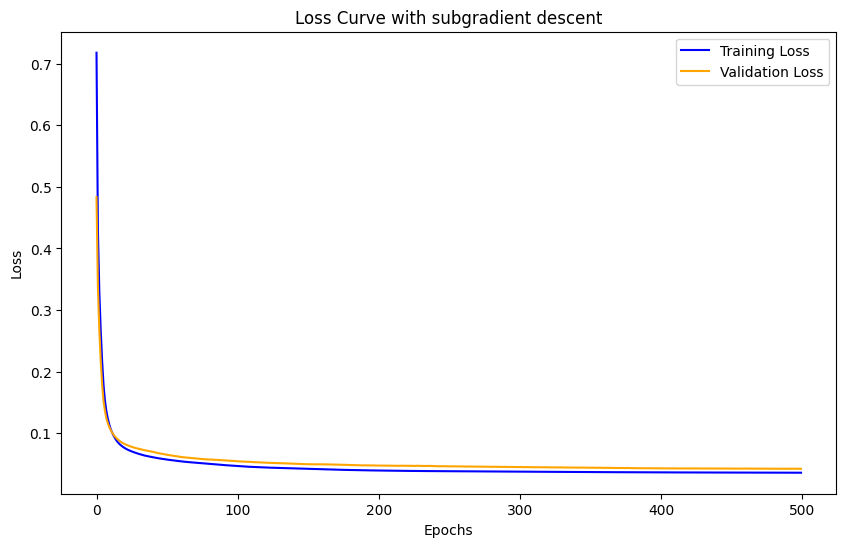

In [32]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_losses_sub, label='Training Loss', color='blue')
if val_accuracies_sub is not None:
    plt.plot(val_losses_sub, label='Validation Loss', color='orange')

plt.title('Loss Curve with subgradient descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuarcy curve for train & validation with subgradient optimizer 

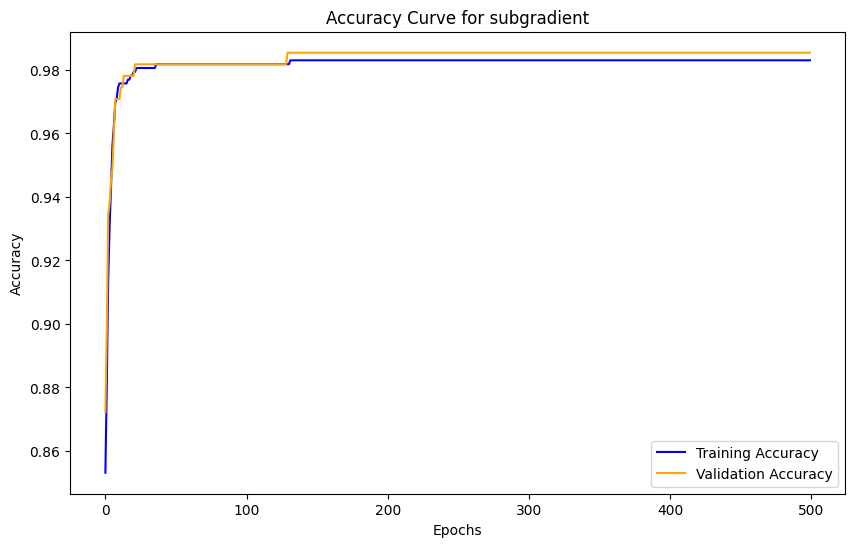

In [33]:
import matplotlib.pyplot as plt

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_sub, label='Training Accuracy', color='blue')
if val_accuracies_sub is not None:
    plt.plot(val_accuracies_sub, label='Validation Accuracy', color='orange')

plt.title('Accuracy Curve for subgradient')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Training 500 epoch with gradient decsent

In [34]:
svm_gradient = SVMFromScratch(**best_config_grad)

# Train the model
train_losses_grad, train_accuracies_grad, val_accuracies_grad, val_losses_grad,test_accuracies_grad, test_losses_grad= svm_gradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_gradient.max_iter):
    train_loss_grad = train_losses_grad[epoch]
    val_loss_grad =val_losses_grad[epoch]
    train_acc_grad = train_accuracies_grad[epoch]
    val_acc_grad = val_accuracies_grad[epoch] if val_accuracies_grad is not None else "N/A"
    
    print(f"Epoch {epoch+1} | train_Loss: {train_loss_grad:.4f} | Train Acc: {train_acc_grad:.4f} | Val Acc: {val_acc_grad if val_acc_grad == 'N/A' else f'{val_acc_grad:.4f}'} | val loss: {val_loss_grad if val_acc_grad == 'N/A' else f'{val_loss_grad:.4f}'}")



Epoch 1 | train_Loss: 0.8291 | Train Acc: 0.8968 | Val Acc: 0.9343 | val loss: 0.7266
Epoch 2 | train_Loss: 0.6916 | Train Acc: 0.9430 | Val Acc: 0.9453 | val loss: 0.6475
Epoch 3 | train_Loss: 0.6297 | Train Acc: 0.9624 | Val Acc: 0.9635 | val loss: 0.5992
Epoch 4 | train_Loss: 0.5877 | Train Acc: 0.9709 | Val Acc: 0.9708 | val loss: 0.5635
Epoch 5 | train_Loss: 0.5558 | Train Acc: 0.9757 | Val Acc: 0.9708 | val loss: 0.5358
Epoch 6 | train_Loss: 0.5306 | Train Acc: 0.9757 | Val Acc: 0.9745 | val loss: 0.5132
Epoch 7 | train_Loss: 0.5098 | Train Acc: 0.9757 | Val Acc: 0.9745 | val loss: 0.4941
Epoch 8 | train_Loss: 0.4923 | Train Acc: 0.9769 | Val Acc: 0.9745 | val loss: 0.4774
Epoch 9 | train_Loss: 0.4770 | Train Acc: 0.9794 | Val Acc: 0.9818 | val loss: 0.4628
Epoch 10 | train_Loss: 0.4635 | Train Acc: 0.9794 | Val Acc: 0.9818 | val loss: 0.4498
Epoch 11 | train_Loss: 0.4516 | Train Acc: 0.9794 | Val Acc: 0.9818 | val loss: 0.4381
Epoch 12 | train_Loss: 0.4408 | Train Acc: 0.9806 | 

**notice here the loss in both train and validation in gradient method is more than that in subgradient method, accuracy in gradient is slightly greater than that it subgradient**

### Loss curve for train & validation with gradient optimizer 

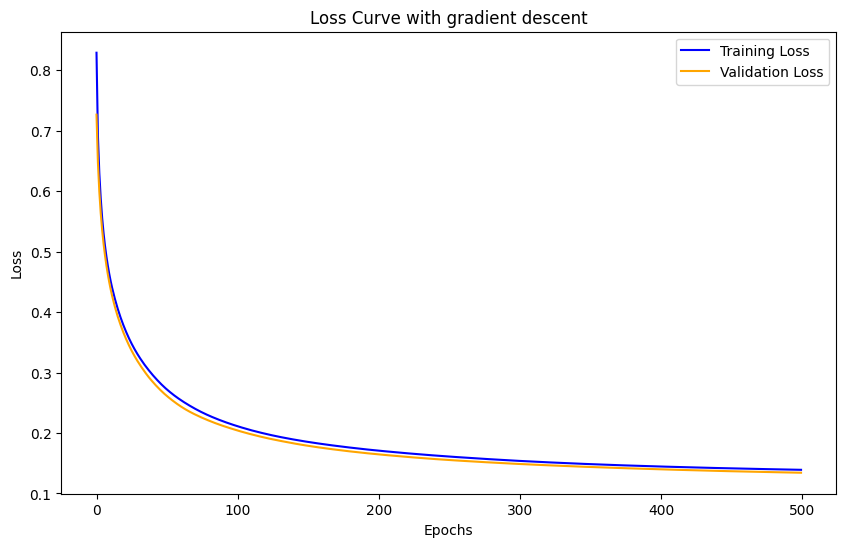

In [35]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_losses_grad, label='Training Loss', color='blue')
if val_accuracies_grad is not None:
    plt.plot(val_losses_grad, label='Validation Loss', color='orange')

plt.title('Loss Curve with gradient descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

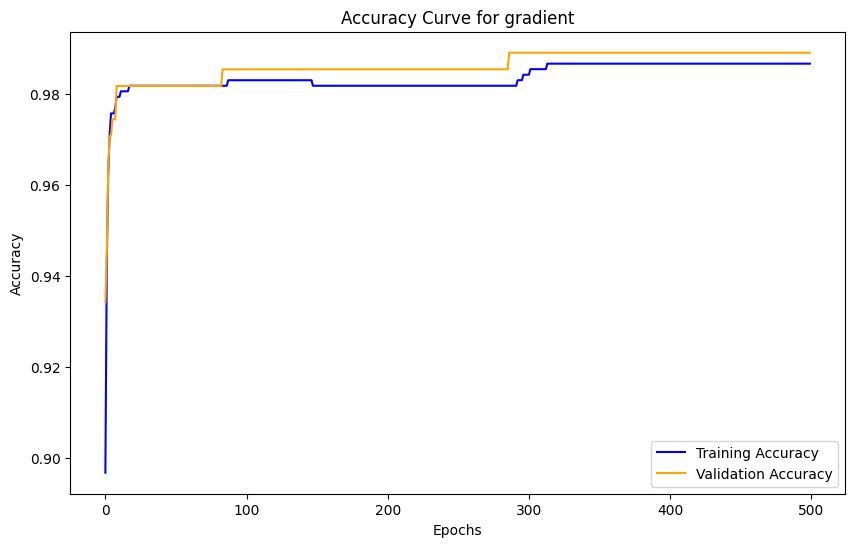

In [36]:
import matplotlib.pyplot as plt

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_grad, label='Training Accuracy', color='blue')
if val_accuracies_grad is not None:
    plt.plot(val_accuracies_grad, label='Validation Accuracy', color='orange')

plt.title('Accuracy Curve for gradient')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## model testing with subgradient

In [37]:
svm_subgradient = SVMFromScratch(**best_config_subgrad)

# Train the model
train_losses_sub, train_accuracies_sub, val_accuracies_sub, val_losses_sub,test_accuracies_sub, test_losses_sub= svm_subgradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_subgradient.max_iter):
    test_loss_sub = test_losses_sub[epoch]
    test_acc_sub = test_accuracies_sub[epoch]
    
    print(f"Epoch {epoch+1} | test_Loss: {test_loss_sub:.4f} | Test Acc: {test_acc_sub:.4f} ")



Epoch 1 | test_Loss: 0.5271 | Test Acc: 0.8723 
Epoch 2 | test_Loss: 0.3720 | Test Acc: 0.9197 
Epoch 3 | test_Loss: 0.2894 | Test Acc: 0.9307 
Epoch 4 | test_Loss: 0.2309 | Test Acc: 0.9416 
Epoch 5 | test_Loss: 0.1854 | Test Acc: 0.9672 
Epoch 6 | test_Loss: 0.1513 | Test Acc: 0.9708 
Epoch 7 | test_Loss: 0.1287 | Test Acc: 0.9781 
Epoch 8 | test_Loss: 0.1128 | Test Acc: 0.9818 
Epoch 9 | test_Loss: 0.1010 | Test Acc: 0.9854 
Epoch 10 | test_Loss: 0.0918 | Test Acc: 0.9854 
Epoch 11 | test_Loss: 0.0852 | Test Acc: 0.9854 
Epoch 12 | test_Loss: 0.0802 | Test Acc: 0.9854 
Epoch 13 | test_Loss: 0.0762 | Test Acc: 0.9854 
Epoch 14 | test_Loss: 0.0728 | Test Acc: 0.9854 
Epoch 15 | test_Loss: 0.0702 | Test Acc: 0.9854 
Epoch 16 | test_Loss: 0.0679 | Test Acc: 0.9854 
Epoch 17 | test_Loss: 0.0658 | Test Acc: 0.9854 
Epoch 18 | test_Loss: 0.0637 | Test Acc: 0.9854 
Epoch 19 | test_Loss: 0.0620 | Test Acc: 0.9854 
Epoch 20 | test_Loss: 0.0604 | Test Acc: 0.9854 
Epoch 21 | test_Loss: 0.0589 

**with subgradient, test loss decreased to 0.02**

## Model testing with gradient

In [38]:
svm_gradient = SVMFromScratch(**best_config_grad)

# Train the model
train_losses_grad, train_accuracies_grad, val_accuracies_grad, val_losses_grad,test_accuracies_grad, test_losses_grad= svm_gradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_gradient.max_iter):
    test_acc_grad = test_accuracies_grad[epoch]
    test_loss_grad = test_losses_grad[epoch]

    
    print(f"Epoch {epoch+1} | test_Loss: {test_loss_grad:.4f} | Test Acc: {test_acc_grad:.4f} ")



Epoch 1 | test_Loss: 0.7456 | Test Acc: 0.9307 
Epoch 2 | test_Loss: 0.6639 | Test Acc: 0.9672 
Epoch 3 | test_Loss: 0.6135 | Test Acc: 0.9818 
Epoch 4 | test_Loss: 0.5764 | Test Acc: 0.9854 
Epoch 5 | test_Loss: 0.5473 | Test Acc: 0.9854 
Epoch 6 | test_Loss: 0.5239 | Test Acc: 0.9854 
Epoch 7 | test_Loss: 0.5043 | Test Acc: 0.9854 
Epoch 8 | test_Loss: 0.4873 | Test Acc: 0.9854 
Epoch 9 | test_Loss: 0.4723 | Test Acc: 0.9854 
Epoch 10 | test_Loss: 0.4591 | Test Acc: 0.9854 
Epoch 11 | test_Loss: 0.4473 | Test Acc: 0.9854 
Epoch 12 | test_Loss: 0.4366 | Test Acc: 0.9854 
Epoch 13 | test_Loss: 0.4267 | Test Acc: 0.9854 
Epoch 14 | test_Loss: 0.4175 | Test Acc: 0.9854 
Epoch 15 | test_Loss: 0.4089 | Test Acc: 0.9854 
Epoch 16 | test_Loss: 0.4009 | Test Acc: 0.9854 
Epoch 17 | test_Loss: 0.3932 | Test Acc: 0.9854 
Epoch 18 | test_Loss: 0.3859 | Test Acc: 0.9854 
Epoch 19 | test_Loss: 0.3790 | Test Acc: 0.9854 
Epoch 20 | test_Loss: 0.3723 | Test Acc: 0.9854 
Epoch 21 | test_Loss: 0.3659 

**test loss increases when using gradient descent as an optimizer**

## loss comparasion between train & test and validation while using subgradient and gradient

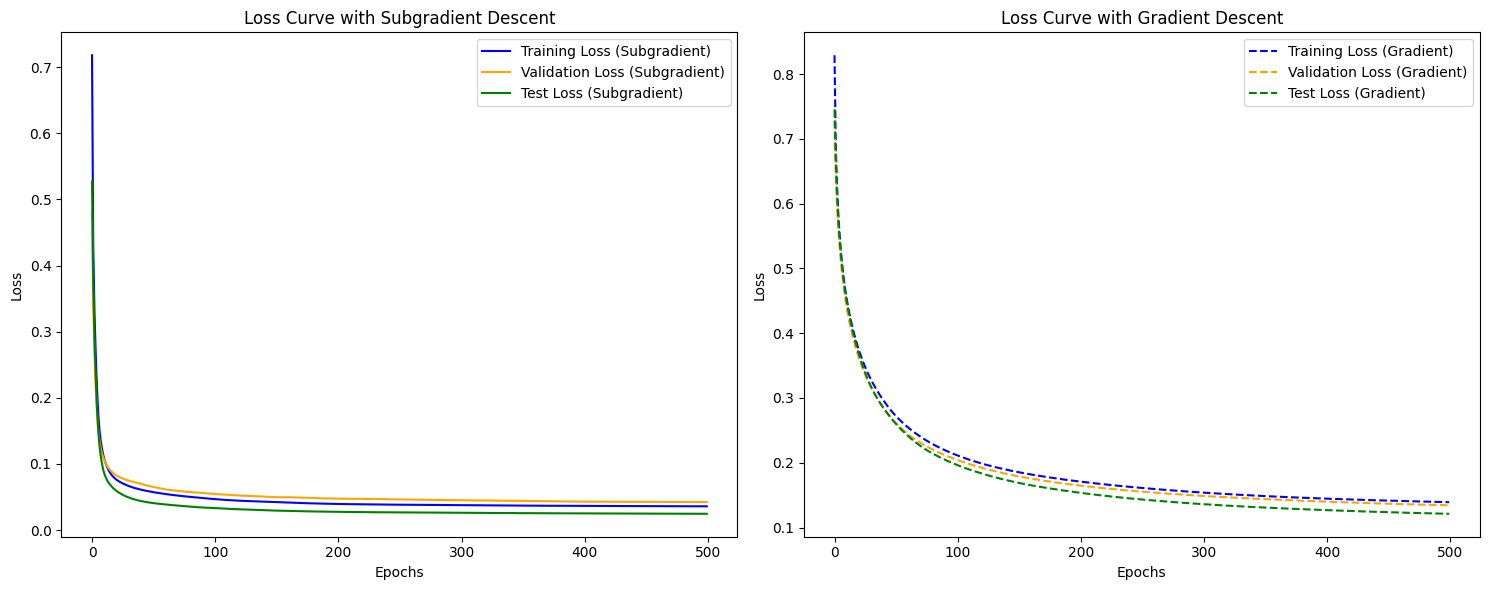

In [39]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the loss curve for Subgradient
ax1.plot(train_losses_sub, label='Training Loss (Subgradient)', color='blue')
ax1.plot(val_losses_sub, label='Validation Loss (Subgradient)', color='orange')
ax1.plot(test_losses_sub, label='Test Loss (Subgradient)', color='green')
ax1.set_title('Loss Curve with Subgradient Descent')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the loss curve for Gradient
ax2.plot(train_losses_grad, label='Training Loss (Gradient)', color='blue', linestyle='--')
ax2.plot(val_losses_grad, label='Validation Loss (Gradient)', color='orange', linestyle='--')
ax2.plot(test_losses_grad, label='Test Loss (Gradient)', color='green', linestyle='--')
ax2.set_title('Loss Curve with Gradient Descent')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the figure
plt.tight_layout()
plt.show()

## loss comparasion between train & test and validation while using subgradient and gradient

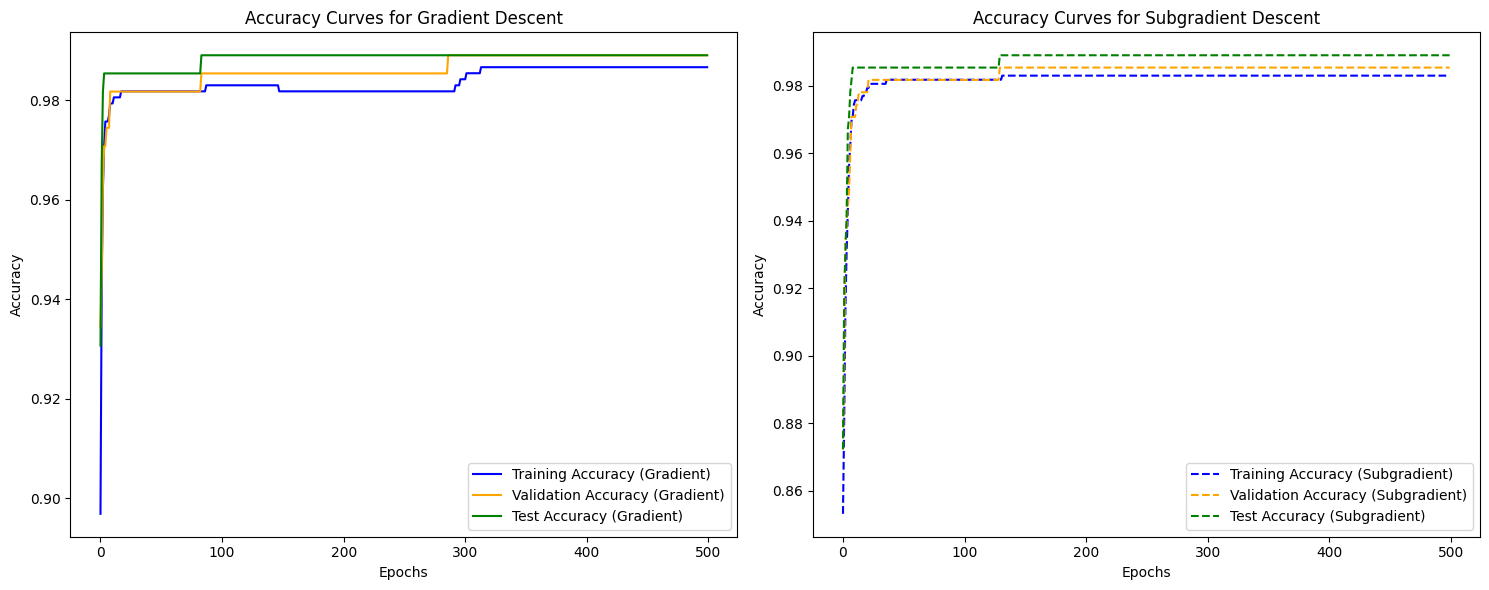

In [40]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the accuracy curves for Gradient Descent
ax1.plot(train_accuracies_grad, label='Training Accuracy (Gradient)', color='blue', linestyle='-')
ax1.plot(val_accuracies_grad, label='Validation Accuracy (Gradient)', color='orange', linestyle='-')
ax1.plot(test_accuracies_grad, label='Test Accuracy (Gradient)', color='green', linestyle='-')
ax1.set_title('Accuracy Curves for Gradient Descent')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the accuracy curves for Subgradient Descent
ax2.plot(train_accuracies_sub, label='Training Accuracy (Subgradient)', color='blue', linestyle='--')
ax2.plot(val_accuracies_sub, label='Validation Accuracy (Subgradient)', color='orange', linestyle='--')
ax2.plot(test_accuracies_sub, label='Test Accuracy (Subgradient)', color='green', linestyle='--')
ax2.set_title('Accuracy Curves for Subgradient Descent')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


## Confusion matrix 

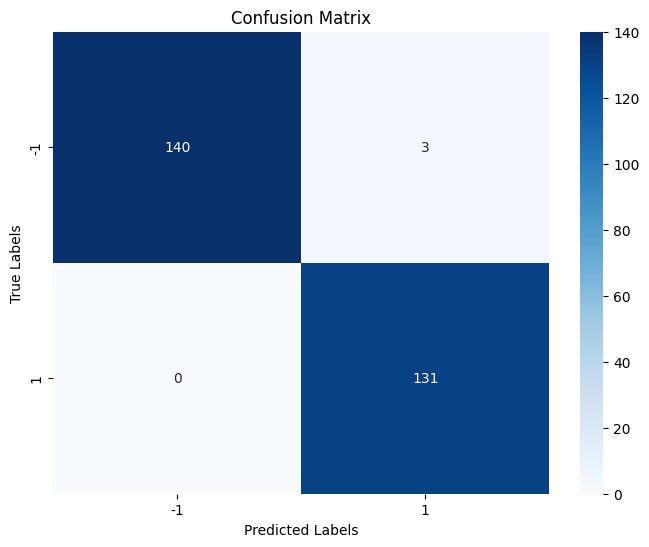

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
unique_labels = np.unique(y_test)
cm = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)

for true, pred in zip(y_test, svm_subgradient.predict(x_test)):
    cm[int(true == 1), int(pred == 1)] += 1

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Initialize confusion matrix values
true_positive = sum((y_test == 1) & (svm_subgradient.predict(x_test) == 1))
false_positive = sum((y_test == -1) & (svm_subgradient.predict(x_test) == 1))
false_negative = sum((y_test == 1) & (svm_subgradient.predict(x_test) == -1))

# Calculate precision and recall
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.9776
Recall: 1.0000


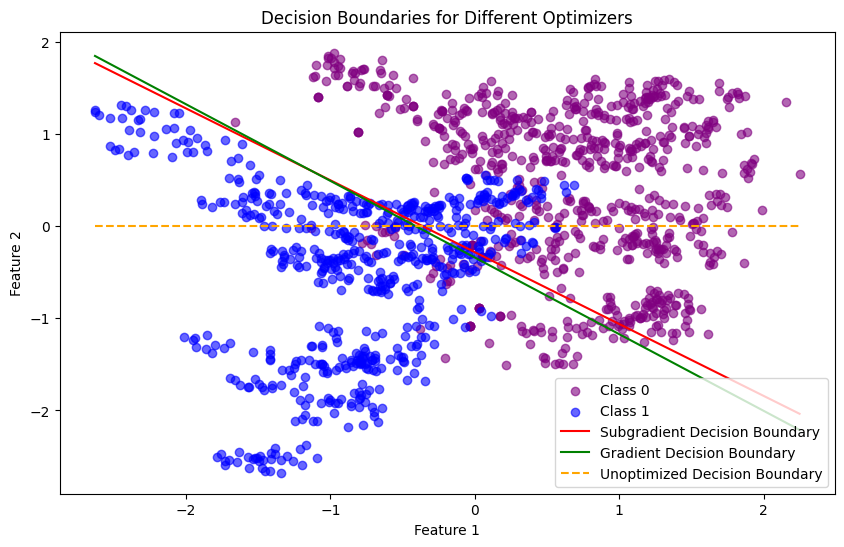

In [43]:
# Extract weights and bias for gradient optimizer
w_grad = svm_gradient.w
b_grad = svm_gradient.b

# Extract weights and bias for the unoptimized model (assuming initial weights and bias are zeros)
w_unoptimized = np.zeros_like(w_grad)
b_unoptimized = 0

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0][y == -1], x[:, 1][y == -1], color='purple', label='Class 0', alpha=0.6)
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], color='blue', label='Class 1', alpha=0.6)

# Define weights and bias for subgradient optimizer
w = svm_subgradient.w
b = svm_subgradient.b

# Define x1 range for plotting
x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)

# Plot the decision boundary for subgradient optimizer
x2_sub = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2_sub, color='red', label='Subgradient Decision Boundary')

# Plot the decision boundary for gradient optimizer
x2_grad = -(w_grad[0] * x1 + b_grad) / w_grad[1]
plt.plot(x1, x2_grad, color='green', label='Gradient Decision Boundary')

# Plot the decision boundary for unoptimized model
x2_unoptimized = -(w_unoptimized[0] * x1 + b_unoptimized) / (w_unoptimized[1] + 1e-10)  # Avoid division by zero
plt.plot(x1, x2_unoptimized, color='orange', label='Unoptimized Decision Boundary', linestyle='--')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for Different Optimizers')
plt.legend()
plt.show()

# Comparative Analysis


## Accuracy Comparison

Subgradient Descent: **98.30%** train, **98.54%** validation accuracy.

Gradient Descent: **98.67%** train, **98.91%** validation accuracy.

**Conclusion:** Gradient Descent generalizes better.

## Convergence Speed

Gradient Descent converged at epoch: **500**.

Subgradient Descent converged at epoch: **225**.

**Conclusion:** Subgradient Descent converged faster than Gradient Descent.

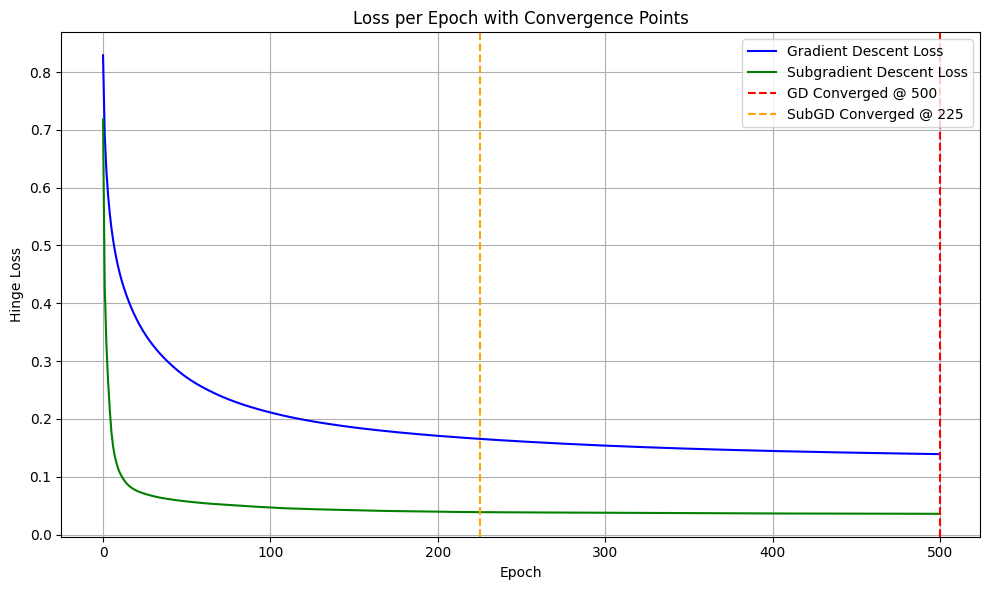

## Stability of the Loss Function

Subgradient Descent loss variance: **0.0415**.

Gradient Descent loss variance: **0.0804**.

**Conclusion:** Subgradient Descent is more stable.

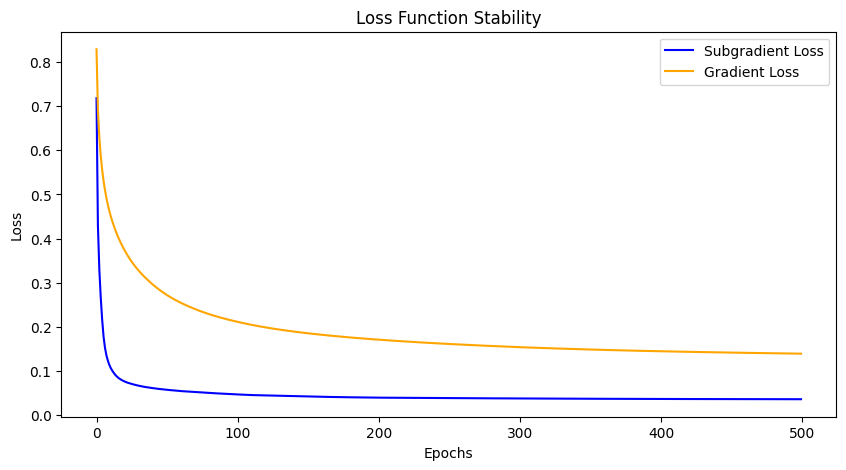

## Generalization on Test Data

Subgradient Descent test accuracy: **98.91%**.

Gradient Descent test accuracy: **98.91%**.

**Conclusion:** Both methods generalize equally well.

### Confusion Matrix for Subgradient Descent

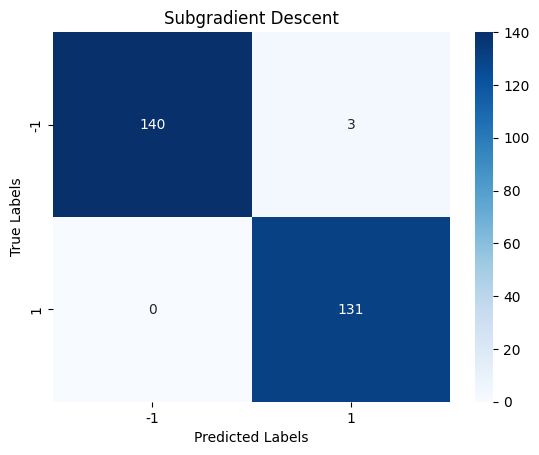

### Confusion Matrix for Gradient Descent

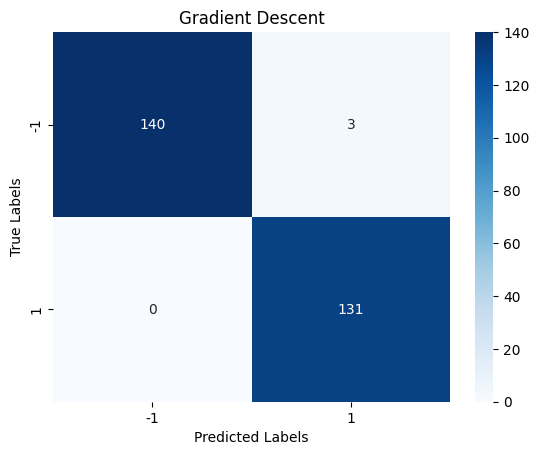

In [49]:
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

def find_convergence_epoch(losses, threshold=1e-4, patience=5):
    """
    Detects convergence: if the loss change over 'patience' epochs is below 'threshold'.
    """
    for i in range(len(losses) - patience):
        window = losses[i:i+patience]
        if max(window) - min(window) < threshold:
            return i + patience
    return len(losses)

def plot_loss_with_convergence(train_losses_grad, train_losses_sub, epoch_gd, epoch_sub):
    plt.figure(figsize=(10, 6))
    
    # Plot the loss curves
    plt.plot(train_losses_grad, label='Gradient Descent Loss', color='blue')
    plt.plot(train_losses_sub, label='Subgradient Descent Loss', color='green')
    
    # Plot vertical lines for convergence
    plt.axvline(x=epoch_gd, color='red', linestyle='--', label=f'GD Converged @ {epoch_gd}')
    plt.axvline(x=epoch_sub, color='orange', linestyle='--', label=f'SubGD Converged @ {epoch_sub}')
    
    # Labels and title
    plt.title('Loss per Epoch with Convergence Points')
    plt.xlabel('Epoch')
    plt.ylabel('Hinge Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def display_results():
    # Accuracy Comparison
    display(Markdown("## Accuracy Comparison"))
    sub_train_acc, sub_val_acc = train_accuracies_sub[-1] * 100, val_accuracies_sub[-1] * 100
    grad_train_acc, grad_val_acc = train_accuracies_grad[-1] * 100, val_accuracies_grad[-1] * 100

    display(Markdown(f"Subgradient Descent: **{sub_train_acc:.2f}%** train, **{sub_val_acc:.2f}%** validation accuracy."))
    display(Markdown(f"Gradient Descent: **{grad_train_acc:.2f}%** train, **{grad_val_acc:.2f}%** validation accuracy."))
    display(Markdown("**Conclusion:** " + 
                     ("Subgradient Descent generalizes better." if sub_val_acc > grad_val_acc else "Gradient Descent generalizes better.")))

    # Convergence Speed
    display(Markdown("## Convergence Speed"))
    epoch_gd = find_convergence_epoch(train_losses_grad)
    epoch_sub = find_convergence_epoch(train_losses_sub)

    display(Markdown(f"Gradient Descent converged at epoch: **{epoch_gd}**."))
    display(Markdown(f"Subgradient Descent converged at epoch: **{epoch_sub}**."))

    if epoch_gd < epoch_sub:
        display(Markdown("**Conclusion:** Gradient Descent converged faster than Subgradient Descent."))
    else:
        display(Markdown("**Conclusion:** Subgradient Descent converged faster than Gradient Descent."))

    # Plot Loss Curves with Convergence Points
    plot_loss_with_convergence(train_losses_grad, train_losses_sub, epoch_gd, epoch_sub)

    # Stability of the Loss Function
    display(Markdown("## Stability of the Loss Function"))
    sub_loss_std, grad_loss_std = np.std(train_losses_sub), np.std(train_losses_grad)

    display(Markdown(f"Subgradient Descent loss variance: **{sub_loss_std:.4f}**."))
    display(Markdown(f"Gradient Descent loss variance: **{grad_loss_std:.4f}**."))
    display(Markdown("**Conclusion:** " + 
                     ("Subgradient Descent is more stable." if sub_loss_std < grad_loss_std else "Gradient Descent is more stable.")))

    # Plot Loss Curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses_sub, label='Subgradient Loss', color='blue')
    plt.plot(train_losses_grad, label='Gradient Loss', color='orange')
    plt.title('Loss Function Stability')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Generalization on Test Data
    display(Markdown("## Generalization on Test Data"))
    sub_test_acc, grad_test_acc = test_accuracies_sub[-1] * 100, test_accuracies_grad[-1] * 100

    display(Markdown(f"Subgradient Descent test accuracy: **{sub_test_acc:.2f}%**."))
    display(Markdown(f"Gradient Descent test accuracy: **{grad_test_acc:.2f}%**."))
    display(Markdown("**Conclusion:** " + 
                     ("Subgradient Descent generalizes better." if sub_test_acc > grad_test_acc else 
                      "Gradient Descent generalizes better." if sub_test_acc < grad_test_acc else 
                      "Both methods generalize equally well.")))

    # Confusion Matrices
    def plot_confusion_matrix(model, title):
        cm = np.zeros((2, 2), dtype=int)
        for true, pred in zip(y_test, model.predict(x_test)):
            cm[int(true == 1), int(pred == 1)] += 1
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["-1", "1"], yticklabels=["-1", "1"])
        plt.title(title)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

    display(Markdown("### Confusion Matrix for Subgradient Descent"))
    plot_confusion_matrix(svm_subgradient, "Subgradient Descent")

    display(Markdown("### Confusion Matrix for Gradient Descent"))
    plot_confusion_matrix(svm_gradient, "Gradient Descent")

# Call the function to display results
display_results()